# TASK 4

# Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.



Dataset :-  https://www.kaggle.com/gti-upm/leapgestrecog

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

# Dataset

In [3]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
data_path = "leapgestrecog/leapGestRecog"

In [4]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass

# Data Preprocessing

In [5]:
import random
random.shuffle(image_data)
input_data = []
label = []

In [6]:
for X, y in image_data:
    input_data.append(X)
    label.append(y)
label[:10]

[9, 0, 4, 7, 3, 9, 4, 4, 2, 5]

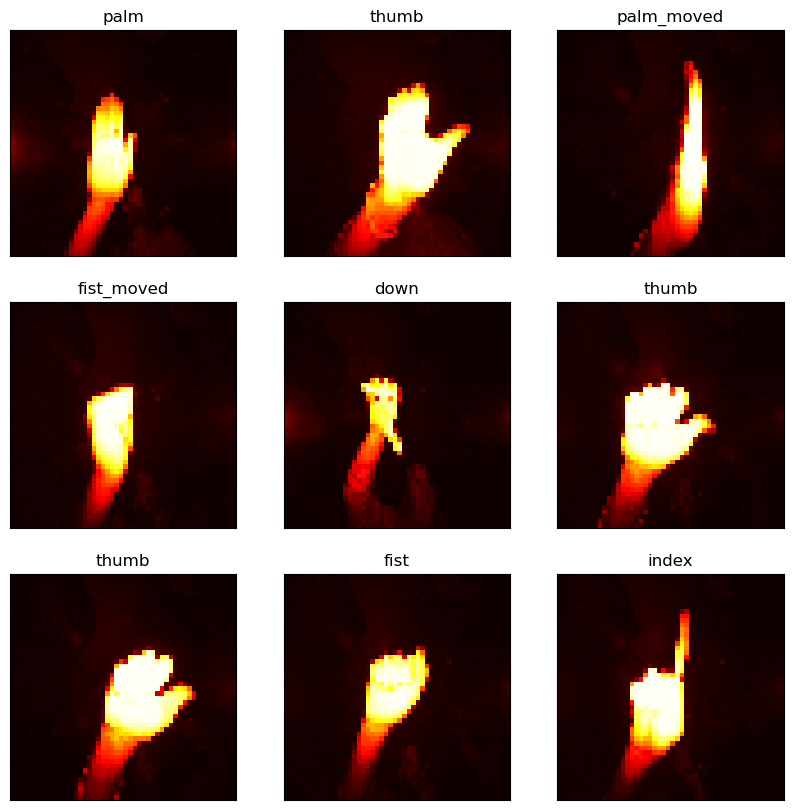

In [7]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

# Normalizing the data

In [8]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [9]:
label = keras.utils.to_categorical(label, num_classes=10)
label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [10]:
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

# Build CNN Model and train

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [12]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

# Model performance

In [13]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 152s 325ms/step - loss: 0.3359 - accuracy: 0.8912 - val_loss: 0.0139 - val_accuracy: 0.9970
Epoch 2/7
438/438 [==============================] - 141s 321ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.0081 - val_accuracy: 0.9983
Epoch 3/7
438/438 [==============================] - 141s 321ms/step - loss: 0.0068 - accuracy: 0.9983 - val_loss: 0.0010 - val_accuracy: 0.9997
Epoch 4/7
438/438 [==============================] - 139s 317ms/step - loss: 0.0083 - accuracy: 0.9983 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 5/7
438/438 [==============================] - 92s 211ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0224 - val_accuracy: 0.9923
Epoch 6/7
438/438 [==============================] - 80s 182ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 7/7
438/438 [==============================] - 77s 175ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0014 - val_accur

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

# Model Evaluvation

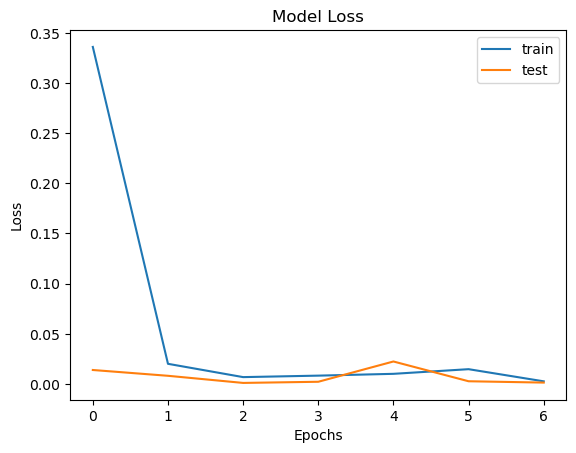

In [21]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

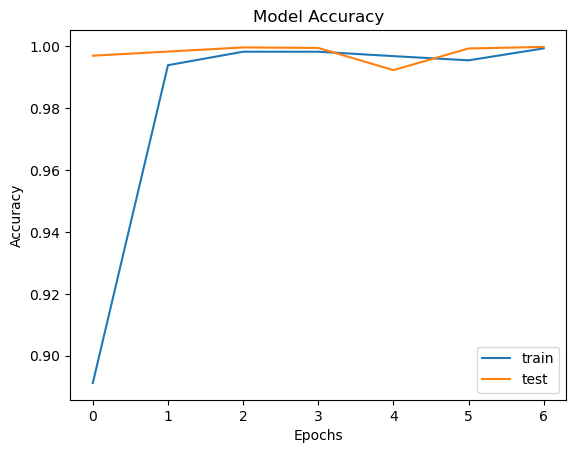

In [22]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Testing Model

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 7s 38ms/step - loss: 0.0014 - accuracy: 0.9998
Test accuracy: 99.98%


# Confusion Matrix

188/188 [==============================] - 7s 38ms/step


[]

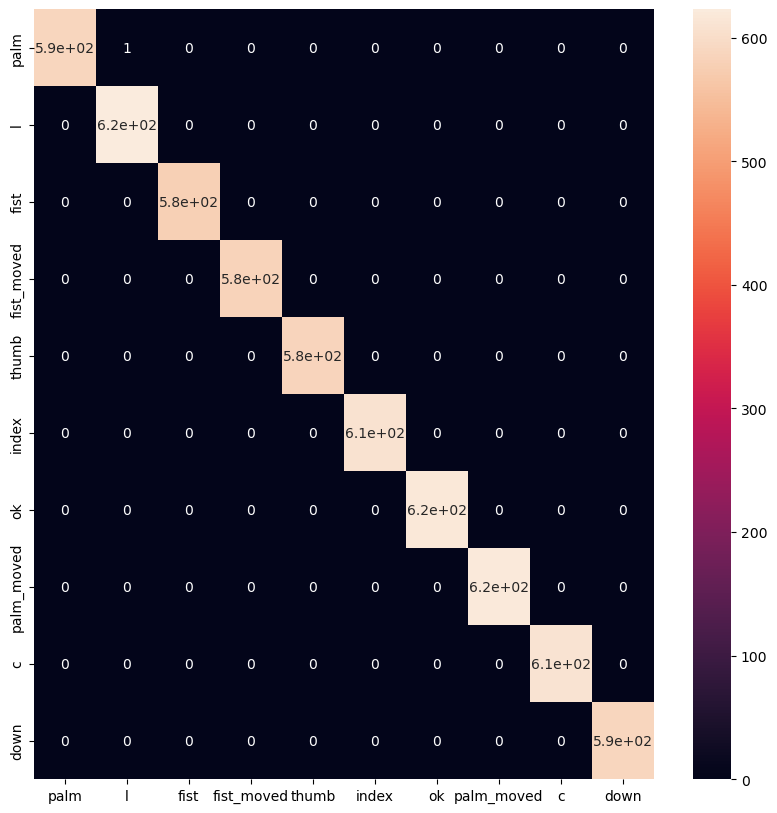

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

# Interpretation

The accuracy of the CNN model is approximately 99.98%, indicating that it can accurately classify hand gestures from the Leap Gesture Recognition Dataset.
